In [1]:
#stock price prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
C:\Users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [2]:
d=pd.read_csv("all_stocks_5yr..csv")
d.head()

,date,open,high,low,close,volume,Name
0,08-02-13,15.07,15.12,14.63,14.75,8407500,AAL
1,11-02-13,14.89,15.01,14.26,14.46,8882000,AAL
2,12-02-13,14.45,14.51,14.10,14.27,8126000,AAL
3,13-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,14-02-13,14.94,14.96,13.16,13.99,31879900,AAL


['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ADSK' 'ADS' 'AEP' 'AES' 'AET' 'AFL'
 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS'
 'APA' 'APC' 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY'
 'AWK' 'AXP' 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BDX' 'BEN' 'BF.B'
 'BHF' 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP'
 'CAG' 'CAH' 'CAT' 'CA' 'CBG' 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG'
 'CERN' 'CFG' 'CF' 'COP' 'COST' 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX'
 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'C' 'DAL' 'DE' 'DFS' 'DG'
 'DHI' 'DHR' 'DISCA' 'DISCK' 'DISH' 'DIS' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE'
 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'DWDP' 'DXC' 'D' 'EA' 'EBAY' 'ECL' 'ED'
 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'EOG' 'EQIX' 'EQR' 'EQT' 'ESRX' 'ESS' 'ES'
 'ETFC' 'ETN' 'ETR' 'EVHC' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR' 'FAST' 'FBHS'
 'FB' 'FCX' 'FDX' 'FE' 'FFIV' 'FISV' 'FIS' 'FITB' 'FLIR' 'FLR' 'FLS' 'FL'
 'FMC' 'FOXA' 'FOX' 'FRT' 'FTI' 'FTV' 'F' 'GD' 'GGP' 'GILD' 'GIS' '

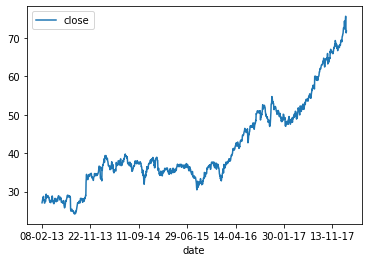

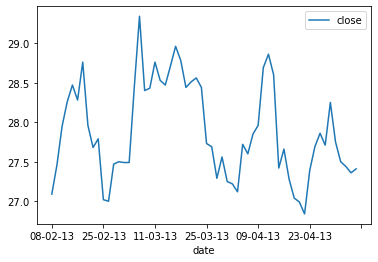

In [3]:
uniqueValues = d['Name'].unique()
print(uniqueValues )
x=input("Enter Stock Price Name You want to get predicted: ")
d1=d['Name']==x
d2=d[d1]
d2.plot('date','close')
main=d2.head(60)
main.plot('date','close')

In [4]:
data = d2.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) *.7)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [5]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [6]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [7]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
822/822 [==============================] - 63s 76ms/step - loss: 8.4555e-04


In [9]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [10]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [11]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.1488223825006623

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


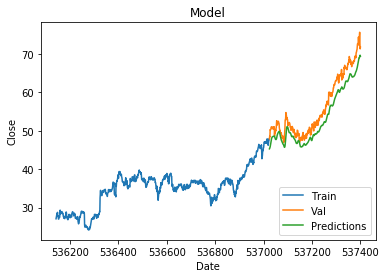

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [13]:
valid

,close,Predictions
537024,47.89,45.301888
537025,48.54,45.429241
537026,48.45,45.628399
537027,50.32,45.825706
537028,50.20,46.217411
...,...,...
537396,74.84,69.045471
537397,75.66,69.257225
537398,72.66,69.635048
537399,71.33,69.671898
